# Features selection

In [ ]:
# Author: Soumya Sambeet Mohapatra
# Date: 03-05-2022
# Description: Code to select most relevant features using Heatmap of Correlation matrix

* This notebook contains code for selection of important features from the dataset.
* The important features are selected and filtered from the dataset and stored in a new file.
* The definitions of the selected features are provided below for reference.

## Importing modules

In [7]:
import pandas as pd
import seaborn as sns

## Loading data from CSV file

In [3]:
df = pd.read_csv('genre_data_clean.csv')
df.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature,year,genre
0,0.507,0.7100,5,-5.020,1,0.0291,0.0975,0.000011,0.170,0.450,134.647,audio_features,14J3PO0VnhtcRa31r7Aj1L,spotify:track:14J3PO0VnhtcRa31r7Aj1L,https://api.spotify.com/v1/tracks/14J3PO0Vnhtc...,https://api.spotify.com/v1/audio-analysis/14J3...,273573,4,1999,acoustic
1,0.496,0.3780,11,-7.878,1,0.0336,0.8980,0.000001,0.109,0.335,144.092,audio_features,2SZDu4esDLUISRnpYQE17b,spotify:track:2SZDu4esDLUISRnpYQE17b,https://api.spotify.com/v1/tracks/2SZDu4esDLUI...,https://api.spotify.com/v1/audio-analysis/2SZD...,277667,3,1999,acoustic
2,0.760,0.7650,0,-9.319,1,0.0352,0.2890,0.000008,0.233,0.868,107.602,audio_features,5E2EpolcGmcbYpsv0z6jAZ,spotify:track:5E2EpolcGmcbYpsv0z6jAZ,https://api.spotify.com/v1/tracks/5E2EpolcGmcb...,https://api.spotify.com/v1/audio-analysis/5E2E...,226933,4,1999,acoustic
3,0.607,0.1960,1,-19.705,1,0.0595,0.9040,0.727000,0.111,0.187,111.031,audio_features,5RVEXH7OR9rcRz7eeviOzc,spotify:track:5RVEXH7OR9rcRz7eeviOzc,https://api.spotify.com/v1/tracks/5RVEXH7OR9rc...,https://api.spotify.com/v1/audio-analysis/5RVE...,223948,4,1999,acoustic
4,0.497,0.0919,3,-15.685,1,0.0704,0.9680,0.002140,0.133,0.548,206.431,audio_features,7CNaYAdLyi86kofGafReiT,spotify:track:7CNaYAdLyi86kofGafReiT,https://api.spotify.com/v1/tracks/7CNaYAdLyi86...,https://api.spotify.com/v1/audio-analysis/7CNa...,139693,4,1999,acoustic


## Removing unnecessary features

There are 21 columns in the dataset. Below is a list of all the columns.

In [4]:
df.columns

Index(['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'type', 'id', 'uri', 'track_href', 'analysis_url', 'duration_ms',
       'time_signature', 'year', 'genre'],
      dtype='object')

It can be identified that the following columns have no significance in training a machine learning mode:

1. `type`
2. `id`
3. `uri`
4. `track_href`
5. `analysis_url`
6. `year`

Therefore, these columns are dropped from the dataset.

In [6]:
df.drop(
    ['type', 'id', 'uri', 'track_href', 'analysis_url', 'year'], 
    axis=1, 
    inplace=True
) 
df.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,genre
0,0.507,0.7100,5,-5.020,1,0.0291,0.0975,0.000011,0.170,0.450,134.647,273573,4,acoustic
1,0.496,0.3780,11,-7.878,1,0.0336,0.8980,0.000001,0.109,0.335,144.092,277667,3,acoustic
2,0.760,0.7650,0,-9.319,1,0.0352,0.2890,0.000008,0.233,0.868,107.602,226933,4,acoustic
3,0.607,0.1960,1,-19.705,1,0.0595,0.9040,0.727000,0.111,0.187,111.031,223948,4,acoustic
4,0.497,0.0919,3,-15.685,1,0.0704,0.9680,0.002140,0.133,0.548,206.431,139693,4,acoustic


## Correlation Matrix

It can be shown that some features are more uncorrelated with the dataset in comparison to others.

<AxesSubplot:>

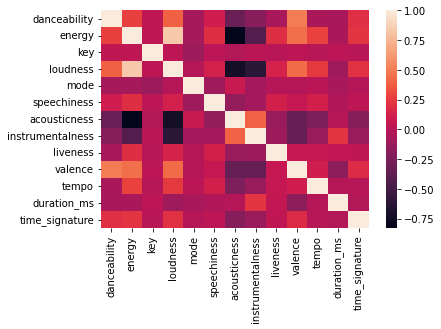

In [8]:
sns.heatmap(df.corr())

From the above correlation matrix, it can be seen that the features `key`, `mode`, `liveness`, and `duration_ms` have nearly 0 correlation. The features `mode`, and `liveliness` do not have much impact on the genre of the music. However, these features can be used for further statistical analysis. Therefore to further reduce the features from our dataset, we remove `key`, and `duration_ms`.

In [9]:
df.drop(['key', 'duration_ms'], axis=1, inplace=True)

## Writing filtered dataset to file

In [12]:
df.to_csv('genre_data_final.csv', index=False)